Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


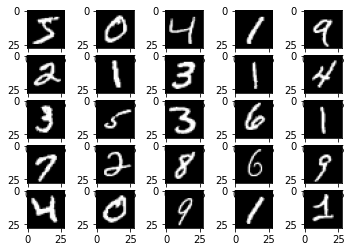

In [6]:
# example of loading and plotting the mnist dataset
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(25):
	# define subplot
	pyplot.subplot(5, 5, i+1)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [7]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


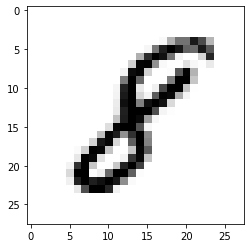

In [8]:
import matplotlib.pyplot as plt

image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [9]:
x_train.shape

(60000, 28, 28)

In [11]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [33]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(Conv2D(28, (3, 3)))
model.add(Conv2D(28, (3, 3)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 28)        7084      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 28)        7084      
_________________________________________________________________
flatten_3 (Flatten)          (None, 13552)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1734784   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [34]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3484 - accuracy: 0.8948
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1347 - accuracy: 0.9594
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1047 - accuracy: 0.9676
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0888 - accuracy: 0.9713
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0767 - accuracy: 0.9750
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0626 - accuracy: 0.9797
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0587 - accuracy: 0.9809
Epoch 8/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0521 - accuracy: 0.9827
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0511 - accuracy: 0.9827
Epoch 10/100
1875/1875 [==============================] - 5s 3ms/step - l

In [35]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3130 - accuracy: 0.9723


[0.3130009174346924, 0.9722999930381775]

9


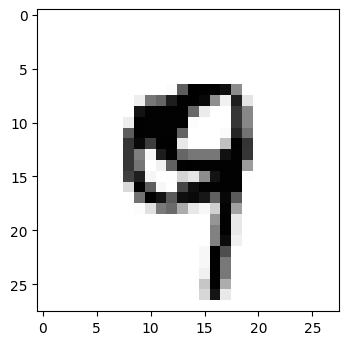

In [36]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [37]:
!git clone https://github.com/gkeechin/vizgradcam

fatal: destination path 'vizgradcam' already exists and is not an empty directory.


In [38]:
cd /content/vizgradcam

/content/vizgradcam


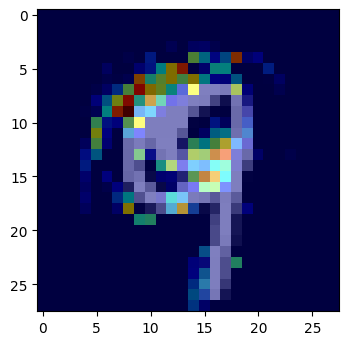

In [39]:
from gradcam import VizGradCAM

test_img = x_test[4444]
VizGradCAM(
    model,   #load model
    test_img
)

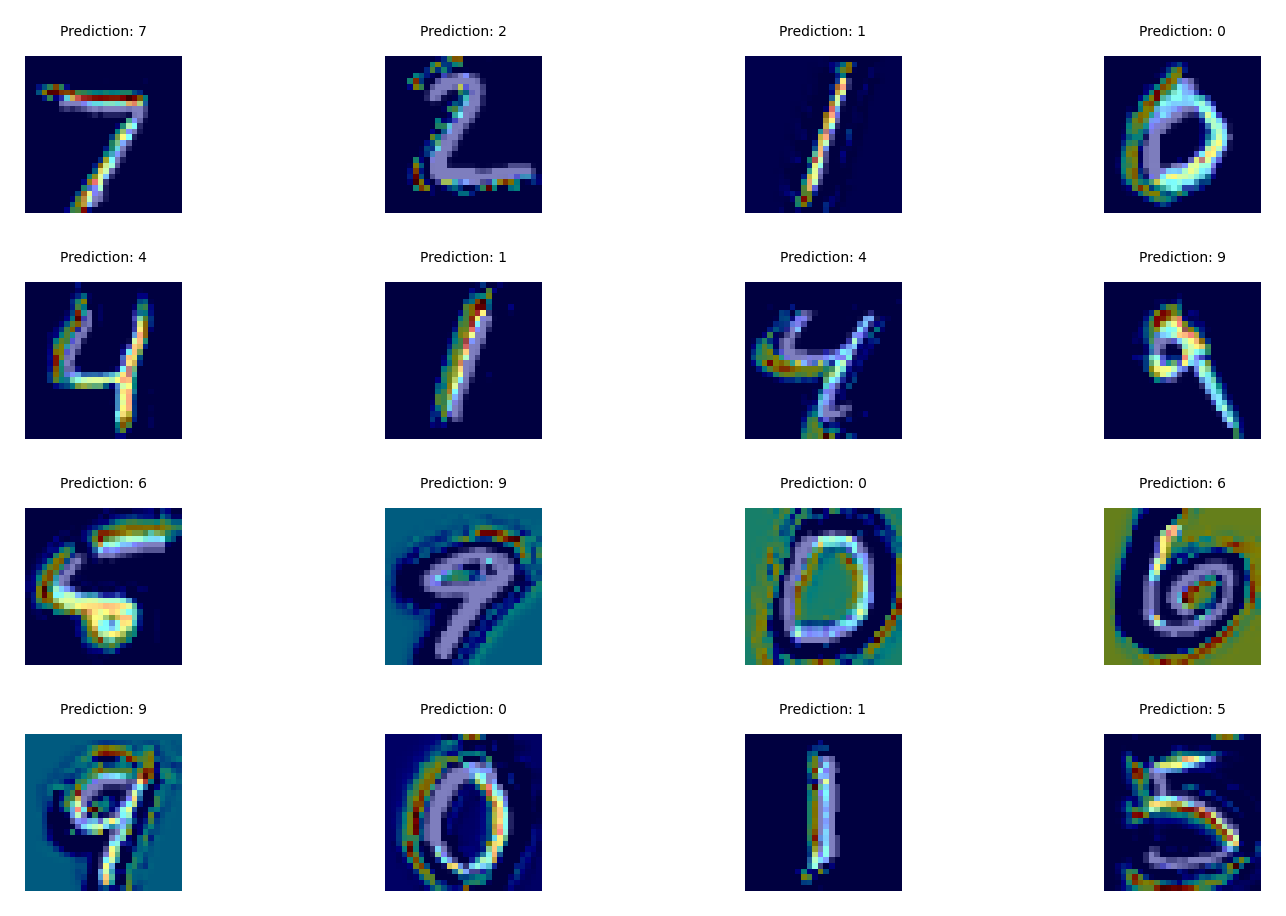

In [60]:
for i in range(16):
	# define subplot
  plt.rcParams["figure.dpi"] = 250
  plt.subplot(4, 4, i+1)
  plt.tight_layout()
  pred = model.predict(x_test[i].reshape(1, 28, 28, 1))
  plt.title("Prediction: " + str(pred.argmax()),fontsize = 4)
  plt.axis('off')
  VizGradCAM(model, x_test[i])

Mnist Code Source:

https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
